In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [3]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 08:18:09.701188


In [0]:
# Calling our modules
import Utils
import QuizDNN
import Model_train
import Model_test

In [0]:
#!pip install -U git+https://github.com/albu/albumentations#

In [0]:
#from Albumentationtransform import AlbumentationTransforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.RandomHorizontalFlip(),
     #transforms.RandomCrop(32, padding=4),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 ship   cat   cat   car


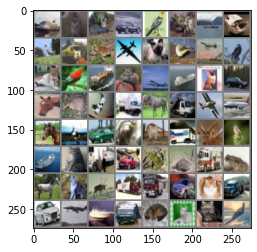

In [8]:


# functions to show an image


# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = QuizDNN.QuizDNN().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model,criterion, device, trainloader, optimizer,scheduler,testloader, epoch):

  Model_train.train(model, criterion,device, trainloader, optimizer, scheduler,epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [23]:
model =  QuizDNN.QuizDNN().to(device)
#model =  Model.Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
EPOCHS = 20


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model,criterion,device, trainloader, optimizer,scheduler,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.9462128281593323 Batch_id=781 Accuracy=50.47: 100%|██████████| 782/782 [00:21<00:00, 35.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -3.6515, Accuracy: 6052/10000 (60.52%)

EPOCH: 2


Loss=0.6283977627754211 Batch_id=781 Accuracy=65.51: 100%|██████████| 782/782 [00:21<00:00, 35.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -4.5094, Accuracy: 6925/10000 (69.25%)

EPOCH: 3


Loss=0.9494465589523315 Batch_id=781 Accuracy=72.24: 100%|██████████| 782/782 [00:22<00:00, 35.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.2695, Accuracy: 7228/10000 (72.28%)

EPOCH: 4


Loss=0.824109673500061 Batch_id=781 Accuracy=76.76: 100%|██████████| 782/782 [00:22<00:00, 34.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -5.8495, Accuracy: 7712/10000 (77.12%)

EPOCH: 5


Loss=1.0982818603515625 Batch_id=781 Accuracy=79.12: 100%|██████████| 782/782 [00:22<00:00, 34.90it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.7647, Accuracy: 7515/10000 (75.15%)

EPOCH: 6


Loss=0.34269294142723083 Batch_id=781 Accuracy=80.60: 100%|██████████| 782/782 [00:22<00:00, 34.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.8594, Accuracy: 7953/10000 (79.53%)

EPOCH: 7


Loss=0.8473645448684692 Batch_id=781 Accuracy=81.86: 100%|██████████| 782/782 [00:22<00:00, 34.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.8185, Accuracy: 7685/10000 (76.85%)

EPOCH: 8


Loss=0.7417640686035156 Batch_id=781 Accuracy=82.67: 100%|██████████| 782/782 [00:22<00:00, 34.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.0777, Accuracy: 7937/10000 (79.37%)

EPOCH: 9


Loss=0.6601857542991638 Batch_id=781 Accuracy=83.35: 100%|██████████| 782/782 [00:22<00:00, 35.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.8351, Accuracy: 7987/10000 (79.87%)

EPOCH: 10


Loss=0.5527483820915222 Batch_id=781 Accuracy=84.10: 100%|██████████| 782/782 [00:22<00:00, 34.89it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.7841, Accuracy: 8051/10000 (80.51%)

EPOCH: 11


Loss=0.6984435319900513 Batch_id=781 Accuracy=84.82: 100%|██████████| 782/782 [00:22<00:00, 35.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -6.9991, Accuracy: 8108/10000 (81.08%)

EPOCH: 12


Loss=0.4852660596370697 Batch_id=781 Accuracy=85.49: 100%|██████████| 782/782 [00:22<00:00, 35.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.3135, Accuracy: 8256/10000 (82.56%)

EPOCH: 13


Loss=0.5171946287155151 Batch_id=781 Accuracy=86.47: 100%|██████████| 782/782 [00:22<00:00, 34.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -7.4299, Accuracy: 8280/10000 (82.80%)

EPOCH: 14


Loss=0.44144919514656067 Batch_id=781 Accuracy=87.59: 100%|██████████| 782/782 [00:22<00:00, 34.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.1247, Accuracy: 8271/10000 (82.71%)

EPOCH: 15


Loss=0.32647401094436646 Batch_id=781 Accuracy=89.06: 100%|██████████| 782/782 [00:22<00:00, 35.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -8.3935, Accuracy: 8407/10000 (84.07%)

EPOCH: 16


Loss=0.36636418104171753 Batch_id=781 Accuracy=90.65: 100%|██████████| 782/782 [00:22<00:00, 35.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.0917, Accuracy: 8532/10000 (85.32%)

EPOCH: 17


Loss=0.3738526999950409 Batch_id=781 Accuracy=92.99: 100%|██████████| 782/782 [00:22<00:00, 34.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -9.7447, Accuracy: 8638/10000 (86.38%)

EPOCH: 18


Loss=0.4051361680030823 Batch_id=781 Accuracy=95.12: 100%|██████████| 782/782 [00:22<00:00, 35.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -10.0560, Accuracy: 8750/10000 (87.50%)

EPOCH: 19


Loss=0.10794615745544434 Batch_id=781 Accuracy=96.61: 100%|██████████| 782/782 [00:22<00:00, 35.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: -10.3204, Accuracy: 8812/10000 (88.12%)

EPOCH: 20


Loss=0.45201680064201355 Batch_id=781 Accuracy=97.14: 100%|██████████| 782/782 [00:22<00:00, 35.28it/s]



Test set: Average loss: -10.3108, Accuracy: 8826/10000 (88.26%)



GroundTruth:   frog   dog plane   dog


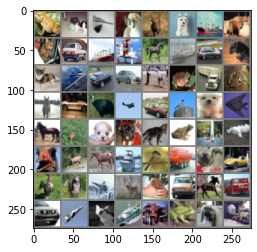

In [24]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   dog  ship plane


In [26]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,device)

Accuracy of the network on the 10000 test images: 88 %


In [27]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,device)    

Accuracy of plane : 91 %
Accuracy of   car : 94 %
Accuracy of  bird : 83 %
Accuracy of   cat : 76 %
Accuracy of  deer : 87 %
Accuracy of   dog : 83 %
Accuracy of  frog : 92 %
Accuracy of horse : 90 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %
